For Random Forest model before and after ReducedOverfitting.

The total RMSE estimation of whole dataset and dataset where damaged values are greater than 10.

In [36]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

import random
import statistics
import matplotlib.pyplot as plt

wor_dir="/home/mforooshani/Typhoon-Impact-based-forecasting-model-training-5:7/IBF-Typhoon-model/"
os.chdir(wor_dir)
cdir = os.getcwd()

combined_input_data=pd.read_csv("Training-data-new/data/model_input/combined_input_data.csv")
#display(combined_input_data)

typhoons_with_impact_data=['bopha2012', 'conson2010', 'durian2006', 'fengshen2008',
       'fung-wong2014', 'goni2015', 'goni2020', 'hagupit2014',
       'haima2016', 'haiyan2013', 'jangmi2014', 'kalmaegi2014',
       'kammuri2019', 'ketsana2009', 'koppu2015', 'krosa2013',
       'linfa2015', 'lingling2014', 'mangkhut2018', 'mekkhala2015',
       'melor2015', 'meranti2016', 'molave2020', 'mujigae2015',
       'nakri2019', 'nari2013', 'nesat2011', 'nock-ten2016', 'noul2015',
       'phanfone2019', 'rammasun2014', 'sarika2016', 'saudel2020',
       'tokage2016', 'trami2013', 'usagi2013', 'utor2013', 'vamco2020',
       'vongfong2020', 'yutu2018']

len(np.unique(combined_input_data.typhoon))
combined_input_data=combined_input_data[combined_input_data.typhoon.isin(typhoons_with_impact_data)]


def set_zeros(x):
    x_max = 25
    y_max = 50
    
    v_max = x[0]
    rainfall_max = x[1]
    damage = x[2]
    if pd.notnull(damage):
        value = damage
    elif v_max > x_max or rainfall_max > y_max:
        value =damage
    elif (v_max < np.sqrt((1- (rainfall_max**2/y_max ** 2))*x_max ** 2)):
        value = 0
    #elif ((v_max < x_max)  and  (rainfall_max_6h < y_max) ):
    #elif (v_max < x_max ):
    #value = 0
    else:
        value = np.nan

    return value
combined_input_data["DAM_perc_dmg"] = combined_input_data[["HAZ_v_max", "HAZ_rainfall_Total", "DAM_perc_dmg"]].apply(set_zeros, axis="columns")


np.mean(combined_input_data["DAM_perc_dmg"])
combined_input_data = combined_input_data[combined_input_data['DAM_perc_dmg'].notnull()]
np.mean(combined_input_data["DAM_perc_dmg"])
np.unique(combined_input_data.typhoon)

def cubeic(x):
    #x=float(x)
    value=x*x*x
    return value

combined_input_data['HAZ_v_max_3']=combined_input_data['HAZ_v_max'].apply(lambda x: x*x*x) 


combined_input_data =combined_input_data.filter(['typhoon','HAZ_rainfall_Total', 
        'HAZ_rainfall_max_6h',
        'HAZ_rainfall_max_24h',
        'HAZ_v_max',
        'HAZ_v_max_3',
        'HAZ_dis_track_min',
        'GEN_landslide_per',
        'GEN_stormsurge_per',
        'GEN_Bu_p_inSSA', 
        'GEN_Bu_p_LS', 
        'GEN_Red_per_LSbldg',
        'GEN_Or_per_LSblg', 
        'GEN_Yel_per_LSSAb', 
        'GEN_RED_per_SSAbldg',
        'GEN_OR_per_SSAbldg',
        'GEN_Yellow_per_LSbl',
        'TOP_mean_slope',
        'TOP_mean_elevation_m', 
        'TOP_ruggedness_stdev', 
        'TOP_mean_ruggedness',
        'TOP_slope_stdev', 
        'VUL_poverty_perc',
        'GEN_with_coast',
        'GEN_coast_length', 
        'VUL_Housing_Units',
        'VUL_StrongRoof_StrongWall', 
        'VUL_StrongRoof_LightWall',
        'VUL_StrongRoof_SalvageWall', 
        'VUL_LightRoof_StrongWall',
        'VUL_LightRoof_LightWall', 
        'VUL_LightRoof_SalvageWall',
        'VUL_SalvagedRoof_StrongWall',
        'VUL_SalvagedRoof_LightWall',
        'VUL_SalvagedRoof_SalvageWall', 
        'VUL_vulnerable_groups',
        'VUL_pantawid_pamilya_beneficiary', 
        'DAM_perc_dmg'])


features_name = combined_input_data.columns
#display(features_name)

features =['HAZ_rainfall_Total', 
        'HAZ_rainfall_max_6h',
        'HAZ_rainfall_max_24h',
        'HAZ_v_max',
        'HAZ_v_max_3',
        'HAZ_dis_track_min',
        'GEN_landslide_per',
        'GEN_stormsurge_per',
        #'GEN_Bu_p_inSSA', 
        #'GEN_Bu_p_LS', 
        'GEN_Red_per_LSbldg',
        'GEN_Or_per_LSblg', 
        'GEN_Yel_per_LSSAb', 
        #'GEN_RED_per_SSAbldg',
        'GEN_OR_per_SSAbldg',
        'GEN_Yellow_per_LSbl',
        'TOP_mean_slope',
        'TOP_mean_elevation_m', 
        'TOP_ruggedness_stdev', 
        #'TOP_mean_ruggedness',
        #'TOP_slope_stdev', 
        'VUL_poverty_perc',
        'GEN_with_coast',
        'GEN_coast_length', 
        'VUL_Housing_Units',
        'VUL_StrongRoof_StrongWall', 
        'VUL_StrongRoof_LightWall',
        'VUL_StrongRoof_SalvageWall', 
        'VUL_LightRoof_StrongWall',
        'VUL_LightRoof_LightWall', 
        'VUL_LightRoof_SalvageWall',
        'VUL_SalvagedRoof_StrongWall',
        'VUL_SalvagedRoof_LightWall',
        'VUL_SalvagedRoof_SalvageWall', 
        'VUL_vulnerable_groups',
        'VUL_pantawid_pamilya_beneficiary']


df=combined_input_data.dropna()
display(df)


typhoon  HAZ_rainfall_Total  HAZ_rainfall_max_6h  \
0      durian2006          185.828571            14.716071   
2      durian2006            8.818750             0.455208   
4      durian2006           24.175000             2.408333   
6      durian2006           14.930000             1.650000   
7      durian2006           13.550000             1.054167   
...           ...                 ...                  ...   
25835    noul2015            9.700000             0.408333   
25837    noul2015           17.587500             1.414583   
25838    noul2015           11.487500             0.614583   
25839    noul2015           11.600000             1.400000   
25841    noul2015           32.305556             1.744444   

       HAZ_rainfall_max_24h  HAZ_v_max    HAZ_v_max_3  HAZ_dis_track_min  \
0                  7.381696  55.032241  166667.757548           2.478142   
2                  0.255319   8.728380     664.968323         288.358553   
4                  0.957639  10.945624    1311.358762         274.953818   
6                  0.586250  12.108701    1775.385328         252.828578   
7                  0.528125  10.660943    1211.676901         258.194381   
...                     ...        ...            ...                ...   
25835              0.216146   8.136932     538.743551         277.107823   
25837              0.386458   9.818999     946.676507         305.789817   
25838              0.230319  15.791907    3938.254316         210.313249   
25839              0.412766  13.867145    2666.620370         218.189328   
25841              1.210417  15.647639    3831.302757         219.542224   

       GEN_landslide_per  GEN_stormsurge_per  GEN_Bu_p_inSSA  ...  \
0                   2.64                6.18            6.18  ...   
2                   0.06                0.00            0.00  ...   
4                   1.52                1.28            1.28  ...   
6                   0.00                0.00            0.00  ...   
7                   5.52                0.36            0.36  ...   
...                  ...                 ...             ...  ...   
25835               1.80                6.25            6.25  ...   
25837               0.00                0.00            0.00  ...   
25838               0.06                0.09            0.09  ...   
25839               0.00                0.00            0.00  ...   
25841               4.15                3.05            3.05  ...   

       VUL_StrongRoof_SalvageWall  VUL_LightRoof_StrongWall  \
0                        0.097425                  2.533055   
2                        0.850008                  1.218595   
4                        0.197179                  0.667374   
6                        0.279362                  0.675125   
7                        0.065703                  0.821288   
...                           ...                       ...   
25835                    0.186916                  3.613707   
25837                    0.209059                  0.383275   
25838                    0.202748                  0.090110   
25839                    0.000000                  0.094518   
25841                    0.031146                 12.198920   

       VUL_LightRoof_LightWall  VUL_LightRoof_SalvageWall  \
0                    41.892832                   1.002088   
2                    13.645253                   0.549120   
4                    15.592295                   0.075838   
6                     7.100454                   0.023280   
7                    30.354796                   0.000000   
...                        ...                        ...   
25835                32.492212                   0.311526   
25837                 4.703833                   0.027875   
25838                 3.063753                   0.022528   
25839                 3.119093                   0.000000   
25841                36.191860                   0.280316   

       VUL_SalvagedRoof_StrongWal

In [37]:
df = df[df['DAM_perc_dmg'] > 10]
df

typhoon  HAZ_rainfall_Total  HAZ_rainfall_max_6h  \
39       durian2006          128.785714             7.623810   
40       durian2006          137.600000            10.846970   
67       durian2006          236.800000            23.022917   
79       durian2006          166.710000            11.723333   
80       durian2006          218.475000            20.925000   
...             ...                 ...                  ...   
23423  vongfong2020          254.525000            23.410417   
23461  vongfong2020          255.687500            21.612500   
23877  vongfong2020          258.160000            18.825000   
23958  vongfong2020          212.800000            15.002381   
25363   meranti2016          281.550000            18.195833   

       HAZ_rainfall_max_24h  HAZ_v_max    HAZ_v_max_3  HAZ_dis_track_min  \
39                 4.991964  67.297247  304783.811133          16.034037   
40                 5.338258  54.729980  163936.581742          14.053818   
67                 9.250000  68.469676  320992.456376          28.294582   
79                 6.353750  64.000391  262148.800838          20.452986   
80                 8.506771  76.858109  454013.837540          16.963048   
...                     ...        ...            ...                ...   
23423              9.786458  47.579864  107713.362477           0.993916   
23461              9.660417  48.218915  112112.054833           7.514910   
23877              9.100833  49.041771  117950.133023           0.746003   
23958              7.574107  43.430665   81919.906658           1.708735   
25363             10.761806  73.139531  391251.952379           4.402487   

       GEN_landslide_per  GEN_stormsurge_per  GEN_Bu_p_inSSA  ...  \
39                  0.61                0.00            0.00  ...   
40                  2.58                7.27            7.27  ...   
67                  5.76                1.26            1.26  ...   
79                  0.97                0.03            0.03  ...   
80                  6.14                2.50            2.50  ...   
...                  ...                 ...             ...  ...   
23423               0.00                0.00            0.00  ...   
23461               0.00                0.00            0.00  ...   
23877               0.00                0.00            0.00  ...   
23958               0.00                0.00            0.00  ...   
25363               5.57                0.22            0.22  ...   

       VUL_StrongRoof_SalvageWall  VUL_LightRoof_StrongWall  \
39                       0.027878                 13.639532   
40                       0.072745                  2.982541   
67                       0.250179                  5.611151   
79                       0.010288                  9.526749   
80                       0.420633                  4.250609   
...                           ...                       ...   
23423                    0.348635                  0.232423   
23461                    0.121556                  4.821718   
23877                    0.980693                  2.666258   
23958                    0.000000                  0.880734   
25363                    0.000000                  4.830918   

       VUL_LightRoof_LightWall  VUL_LightRoof_SalvageWall  \
39                   25.425146                   0.069696   
40                   24.709020                   0.072745   
67                   31.486776                   0.321658   
79                   40.843621                   0.041152   
80                   19.216294                   0.420633   
...                        ...                        ...   
23423                39.628123                   0.232423   
23461                51.782820                   0.526742   
23877                38.768005                   0.796813   
23958                54.311927                   0.183486   
25363                13.285024                   0.000000   

       VUL_

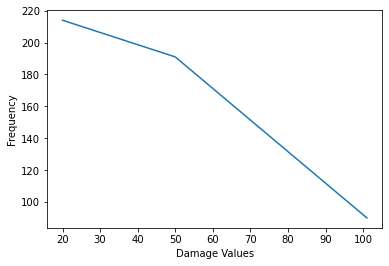

In [38]:
#The defined bin
bins2= [10.0009, 20, 50, 101]
samples_per_bin2, binsP2 = np.histogram(df['DAM_perc_dmg'], bins=bins2)
plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(binsP2[1:],samples_per_bin2)

In [39]:
print(samples_per_bin2)
print(binsP2)

[214 191  90]
[ 10.0009  20.      50.     101.    ]


In [40]:
bin_index2=np.digitize(df['DAM_perc_dmg'], bins=binsP2)

In [41]:
y_input_strat=bin_index2

In [42]:
#the Beginning time to run the model 20 times
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-10 00:54:33


In [43]:

test_RMSE_list=[]
train_RMSE_list=[]


In [44]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statistics
# Split X and y from dataframe features
X = df[features]
display(X.columns)
y = df["DAM_perc_dmg"]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)


for i in range(20): 
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,df['DAM_perc_dmg'], stratify=y_input_strat, 
                                                        test_size=0.2)
    
    #Random Forest Reduced Overfitting
    rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5, max_samples=0.7)
    
    #Random Forest
    #rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5)
    
    rf_model=rf.fit(X_train, y_train)
    
    
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())
    
    y_pred_train = rf.predict(X_train)
    mse_train_idx = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train_idx)
    

    y_pred = rf.predict(X_test)
    mse_idx = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse_idx)
 
    
    print('----- Training ------')
    print(f'Root mean squared error: {rmse_train:.2f}')
 
    
    print('----- Test ------')
    print(f'Root mean squared error: {rmse:.2f}')
    
    
    test_RMSE_list.append(rmse)
    train_RMSE_list.append(rmse_train)


Index(['HAZ_rainfall_Total', 'HAZ_rainfall_max_6h', 'HAZ_rainfall_max_24h',
       'HAZ_v_max', 'HAZ_v_max_3', 'HAZ_dis_track_min', 'GEN_landslide_per',
       'GEN_stormsurge_per', 'GEN_Red_per_LSbldg', 'GEN_Or_per_LSblg',
       'GEN_Yel_per_LSSAb', 'GEN_OR_per_SSAbldg', 'GEN_Yellow_per_LSbl',
       'TOP_mean_slope', 'TOP_mean_elevation_m', 'TOP_ruggedness_stdev',
       'VUL_poverty_perc', 'GEN_with_coast', 'GEN_coast_length',
       'VUL_Housing_Units', 'VUL_StrongRoof_StrongWall',
       'VUL_StrongRoof_LightWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall',
       'VUL_vulnerable_groups', 'VUL_pantawid_pamilya_beneficiary'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9.188
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.80e-30
Time:                        00:54:35   Log-Likelihood:                -1668.1
No. Observations:                 396   AIC:                             3400.
Df Residuals:                     364   BIC:                             3528.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9957      0.865     36.998      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     9.106
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           9.11e-30
Time:                        00:54:36   Log-Likelihood:                -1663.1
No. Observations:                 396   AIC:                             3390.
Df Residuals:                     364   BIC:                             3518.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5586      0.851     37.068      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     10.15
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.04e-33
Time:                        00:54:36   Log-Likelihood:                -1648.3
No. Observations:                 396   AIC:                             3361.
Df Residuals:                     364   BIC:                             3488.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3576      0.822     38.154      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     8.085
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.18e-26
Time:                        00:54:37   Log-Likelihood:                -1671.4
No. Observations:                 396   AIC:                             3407.
Df Residuals:                     364   BIC:                             3534.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3305      0.870     36.020      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     8.895
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.83e-29
Time:                        00:54:38   Log-Likelihood:                -1680.2
No. Observations:                 396   AIC:                             3424.
Df Residuals:                     364   BIC:                             3552.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5698      0.899     35.100      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8.469
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.43e-27
Time:                        00:54:38   Log-Likelihood:                -1670.7
No. Observations:                 396   AIC:                             3405.
Df Residuals:                     364   BIC:                             3533.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5798      0.868     36.377      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     9.306
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.91e-30
Time:                        00:54:39   Log-Likelihood:                -1662.3
No. Observations:                 396   AIC:                             3389.
Df Residuals:                     364   BIC:                             3516.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1601      0.853     36.539      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     9.400
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           9.23e-31
Time:                        00:54:40   Log-Likelihood:                -1651.0
No. Observations:                 396   AIC:                             3366.
Df Residuals:                     364   BIC:                             3493.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9898      0.825     37.560      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     7.241
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.37e-23
Time:                        00:54:40   Log-Likelihood:                -1673.6
No. Observations:                 396   AIC:                             3411.
Df Residuals:                     364   BIC:                             3539.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2461      0.874     35.749      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     7.575
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           2.08e-24
Time:                        00:54:41   Log-Likelihood:                -1677.1
No. Observations:                 396   AIC:                             3418.
Df Residuals:                     364   BIC:                             3546.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4837      0.884     35.617      0.0

In [45]:
#the End time of running the model 20 times
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-10 00:54:41


stdev_RMSE_test: 1.44
stdev_RMSE_train: 0.31
mean_RMSE_test: 18.61
mean_RMSE_train: 12.84


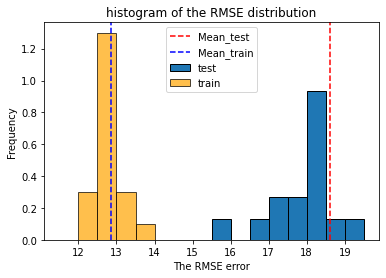

In [48]:
#RMSE

m_test_rmse = statistics.mean(test_RMSE_list)
plt.axvline(m_test_rmse, color='red', linestyle='dashed')
plt.hist(test_RMSE_list, bins=np.arange(11.5,20.0,0.5), edgecolor='k', histtype ='bar', density=True)
sd_test_rmse = statistics.stdev(test_RMSE_list)


m_train_rmse = statistics.mean(train_RMSE_list)
plt.axvline(m_train_rmse, color='b', linestyle='dashed')
plt.hist(train_RMSE_list, bins=np.arange(11.5,20.0,0.5), color='orange', edgecolor='k', histtype ='bar',density=True, alpha=0.7)
sd_train_rmse = statistics.stdev(train_RMSE_list)

print(f'stdev_RMSE_test: {sd_test_rmse:.2f}')
print(f'stdev_RMSE_train: {sd_train_rmse:.2f}')

print(f'mean_RMSE_test: {m_test_rmse:.2f}')
print(f'mean_RMSE_train: {m_train_rmse:.2f}')

#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The RMSE error')
plt.ylabel('Frequency')
plt.title('histogram of the RMSE distribution')
plt.show()